In [9]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/custom.css">

# Towards pandas 1.0

Marc Garcia - @datapythonista

## About me

Marc Garcia - @datapythonista

- 12 years working with Python
- Master degree in AI
- pandas core developer
- Python fellow
- NumFOCUS ambassador / volunteer
- Organiser of the London Python sprints group
- Data scientist at Tesco

## About pandas

![](img/wes.jpg)

- Started by **Wes McKinney** in 2008 in his spare time
 - Mainly to have R's `dataframe` functionality in Python

- Huge API
 - `Series` has 325 public methods/attributes
 - `DataFrame` has 224 public methods/attributes
 - Native support for 14 data formats (besides loading from Python objects)
 - More than 1,200 docstrings

- Huge user base
 - Estimated to have between **5 and 10 million users**

- Developed by the community (contributors and maintainers rarely get paid for their work in pandas)
 - Supported by **NumFOCUS**

## Quick overview

In [69]:
import pandas

df = pandas.read_csv('data/titanic.csv.gz')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
'{:.0%} passengers with unknown age'.format(
    df['Age'].isnull().mean())

'20% passengers with unknown age'

In [71]:
df['Age'].fillna(df.Age.median(), inplace=True)

'{:.0%} passengers with unknown age'.format(
    df['Age'].isnull().mean())

'0% passengers with unknown age'

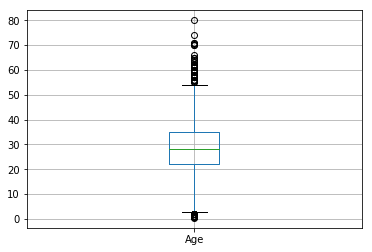

In [72]:
%matplotlib inline

df[['Age']].boxplot();

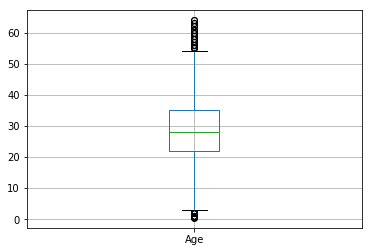

In [73]:
df = df[df.Age < df.Age.quantile(.99)]

df[['Age']].boxplot();

In [74]:
df['Age'] = pandas.cut(df['Age'],
                       bins=[df.Age.min(), 18, 40, df.Age.max()],
                       labels=['Underage', 'Young', 'Experienced'])
df['Age'].head()

0    Young
1    Young
2    Young
3    Young
4    Young
Name: Age, dtype: category
Categories (3, object): [Underage < Young < Experienced]

In [75]:
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0})

df = df.pivot_table(values='Sex', columns='Pclass', index='Age', aggfunc='mean')
df

Pclass,1,2,3
Age,,,
Underage,0.687500,0.482759,0.462366
Young,0.459677,0.404959,0.257703
Experienced,0.371429,0.406250,0.243243


In [31]:
df = df.rename_axis('', axis='columns')
df = df.rename('Class {}'.format, axis='columns')
df.style.format('{:.2%}')

,Class 1,Class 2,Class 3
Age,,,
Underage,68.75%,48.28%,46.24%
Young,51.06%,42.73%,22.62%
Experienced,36.11%,40.62%,23.68%


## pandas update

### Deprecated features

- `.ix` method
 - Use `.loc` and `.iloc` instead

- Deprecation of `Panel` (3-dimensional `DataFrame`)
 - Use `DataFrame` with multi-index, or `x-array` package instead

### Future deprecations (TBC)

- `SparseDataFrame`
 - Main use case is `pandas.get_dummies(sparse=True)`
 - Not sparse like in `coo`, `csc`, `csr`.
 - Incomplete and buggy

- `inplace=True`
 - Like in `df.fillna(0., inplace=True)`

In [32]:
import pandas

df = pandas.read_csv('data/titanic.csv.gz')

df = df[df.Age < df.Age.quantile(.99)]

df['Age'].fillna(df.Age.median(), inplace=True)  # <- Using inplace

df['Age'] = pandas.cut(df['Age'],
                       bins=[df.Age.min(), 18, 40, df.Age.max()],
                       labels=['Underage', 'Young', 'Experienced'])

df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0})

df = df.pivot_table(values='Sex', columns='Pclass', index='Age', aggfunc='mean')

df = df.rename_axis('', axis='columns')

df = df.rename('Class {}'.format, axis='columns')

df.style.format('{:.2%}')

,Class 1,Class 2,Class 3
Age,,,
Underage,68.75%,48.28%,46.24%
Young,51.06%,42.73%,22.62%
Experienced,36.11%,40.62%,23.68%


In [1]:
import pandas

(pandas.read_csv('data/titanic.csv.gz')
       .query('Age < Age.quantile(.99)')
       .assign(Sex=lambda df: df['Sex'].replace({'female': 1, 'male': 0}),
               Age=lambda df: pandas.cut(df['Age'].fillna(df.Age.median()),
                                         bins=[df.Age.min(), 18, 40, df.Age.max()],
                                         labels=['Underage', 'Young', 'Experienced']))
       .pivot_table(values='Sex', columns='Pclass', index='Age', aggfunc='mean')
       .rename_axis('', axis='columns')
       .rename('Class {}'.format, axis='columns')
       .style.format('{:.2%}'))

,Class 1,Class 2,Class 3
Age,,,
Underage,68.75%,48.28%,46.24%
Young,51.06%,42.73%,22.62%
Experienced,36.11%,40.62%,23.68%


### Some reasons

- Readability counts
- Future ability to have lazy evaluation
- Misleading: In place can make a copy

#### Readability counts

In [33]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


#### Lazy evaluation

In [36]:
%time map(lambda x: x ** 2, range(100_000_000_000))

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 14.5 µs


![](img/world.jpg)

In [45]:
import numpy
import pandas

data = pandas.Series(numpy.random.random(1_000_000))

%time data.sort_values(ascending=False).head(3)

CPU times: user 572 ms, sys: 15.7 ms, total: 588 ms
Wall time: 150 ms


427368    0.999999
501769    0.999997
805603    0.999996
dtype: float64

![](img/books.jpg)

In [46]:
%time data.nlargest(3)

CPU times: user 36.6 ms, sys: 3.84 ms, total: 40.4 ms
Wall time: 12.3 ms


427368    0.999999
501769    0.999997
805603    0.999996
dtype: float64

## Distribution of the subtasks

![](img/dask.gif)

- Ibis
 - http://docs.ibis-project.org/


- Dask
 - https://dask.pydata.org
 

- James Powell: Generators will free your mind
 - https://www.youtube.com/watch?v=RdhoN4VVqq8

### Memory copies

```python
>>> df = pandas.DataFrame({'foo': [1., 2.],
...                        'bar': [numpy.nan, 4.]})
   foo  bar
0  1.0  NaN
1  2.0  4.0

```

In place:

```python
>>> df.fillna(0., inplace=True)
>>> df.isnull().any(axis=None)
False
```

Return a copy:

```python
>>> df_copy = df.fillna(0.)
>>> df.isnull().any(axis=None)
True
```

Data representation example: Number 79

- **uint8:** 01001111
- **int32:** 00000000000000000000000001001111
- **float64:** 0100000001010011110000000000000000000000000000000000000000000000
- **object:** `<memory_address> -> <pyobject (refcount, type, size, digit)>`
- **string (ascii):** 0011011100111001

#### NumPy

![](img/numpy.jpg)

Source: https://www.slideshare.net/teoliphant/python-for-data-science-with-anaconda

![](img/blockmanager.png)

Source: https://www.dataquest.io/blog/pandas-big-data/

Changing the size or type of a block requires:

- **Allocate** a block of different size or type
- **Copy** all content to the new block
- **Deallocate** old block

## Why is important whether we copy data or not?

![](img/cpu_memory_speed.jpg)

In [62]:
df = pandas.DataFrame({'foo': [1., 2.],
                       'bar': [numpy.nan, 4.]})

print(df.dtypes)

foo    float64
bar    float64
dtype: object


In [63]:
df.fillna('val', inplace=True)

print(df.dtypes)

foo    float64
bar     object
dtype: object


Notes on memory copies:

- With the `BlockManager` memory copies are frequent


- `inplace=True` does not mean memory is not copied


- `df = df.something()` syntax does not implies memory copies

- Jake VanderPlas: Why Python is Slow: Looking Under the Hood
 - http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/


- Marc Garcia: Demistifying pandas internals
 - https://www.youtube.com/watch?v=F37fV0uFf60

<p style="text-align: center; font-size: 2em; line-height: 2em">
    "The more you know about the internals of pandas DataFrame,<br/>
    the more horrified you are."
</p>

<p style="text-align: right; font-size: 2em">
    Wes McKinney @ SciPy 2018
</p>

### What is the solution?

**Apache arrow** - https://arrow.apache.org/

- Open standard for **columnar data** representation
- Optimised to avoid **CPU cache** misses
- Native representation of complex formats (e.g. **string**, categorical, lists...)
- Built-in **parallelism** (multiple cores support)
- **Chunking**
- Much more

**A back-end designed for pandas needs (and R and others)**

- Wes McKinney: Apache Arrow and the "10 Things I Hate About pandas"
 - http://wesmckinney.com/blog/apache-arrow-pandas-internals/

- Wes McKinney: Apache Arrow, A Cross-Language Development Platform for in Memory Data
 - https://www.youtube.com/watch?v=y7zGnKzaKIw

Already used in pandas and other projecs
- `pandas.from_parquet`
- `pyspark.DataFrame.to_pandas()`
- `turbodbc`

But still work in progress to be the pandas backend 😒

Wes is hiring to work full-time on Arrow at Ursa Labs (C++, remote) 😃

- Ursa Labs announcement: http://wesmckinney.com/blog/announcing-ursalabs/
- Job description: https://hire.withgoogle.com/public/jobs/rstudiocom/view/P_AAAAAACAAADN8HO470lz8Z

## What else is happening in pandas?

- Lots of **maintenance**
 - Bugfixes, automation, cleaning...

- Update to new Python versions
 - Python **3.7** compatibility
 - Use of sorted dicts (DataFrame creation, `assign`...)

In [6]:
import pandas

fib = pandas.DataFrame({'fib1': [1, 1, 1], 'fib2': [1, 1, 1]})
fib

,fib1,fib2
0,1,1
1,1,1
2,1,1


In [7]:
fib = fib.assign(fib3=lambda fib: fib['fib1'] + fib['fib2'],
                 fib4=lambda fib: fib['fib2'] + fib['fib3'])
fib

,fib1,fib2,fib3,fib4
0,1,1,2,3
1,1,1,2,3
2,1,1,2,3


### Dropping Python 2 support

- In January 2019 (yes, in 4.5 months)
 - Not only pandas, also numpy, matplotlib and others

### Some Python 3 features

Old:
```python
samples = 100000000
```

New:
```python
samples = 100_000_000
```

### Some Python 3 features

Old:
```python
print('samples: %s' % samples)
print('samples: {samples}'.format(samples=samples))
```

New:
```python
print(f'samples: {samples}')
```

### Some Python 3 features

```python
data = 'My hovercraft is full of eels.'.split()
```

Old:
```python
first, second, last = data[0], data[1], data[-1]
```

New:
```python
first, second, *discard, last = data
```

### Cost of supporting Python 2

Supporting last version only:
```python
def length(value):
    if isinstance(value, str):
        return len(value)
```

Supporting Python 2:
```python
def length(value):
    if isinstance(value, compat.string_types):
        return compat.strlen(value)
```

### Cost of supporting Python 2

Supporting last version only:
```python
def sorted_apply(func, items):
    return {x: func(x) for x in items}
```

Supporting Python 2:
```python
def sorted_apply(func, items):
    if compat.PY36:
        return {x: func(x) for x in items}
    else:
        result = collections.OrderedDict()
        for x in items:
            result[x] = func(x)
        return result
```

### Dropping Python 2 support

- In January 2019 (yes, in 4.5 months)
 - Not only pandas, also numpy, matplotlib and others

## Extension arrays

In [8]:
import numpy
import pandas

s = pandas.Series([1, 2, 3], dtype=numpy.uint8)

s

0    1
1    2
2    3
dtype: uint8

In [9]:
s.values

array([1, 2, 3], dtype=uint8)

### Categories

In [10]:
s = pandas.Series(['dog', 'cat', 'dog'], dtype='category')

s

0    dog
1    cat
2    dog
dtype: category
Categories (2, object): [cat, dog]

In [14]:
s.values

[dog, cat, dog]
Categories (2, object): [cat, dog]

In [16]:
s.cat.codes

0    1
1    0
2    1
dtype: int8

In [18]:
s.cat.categories

array(['cat', 'dog'], dtype=object)

### Cyberpandas

In [5]:
import cyberpandas

arr = cyberpandas.IPArray(['127.0.0.1', '255.255.255.0'])

s = pandas.Series(arr)

s

0        127.0.0.1
1    255.255.255.0
dtype: ip

### Integer with NaN

In [7]:
import numpy
import pandas

pandas.Series([1, 2, numpy.nan, 4])

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [8]:
import numpy
import pandas

pandas.Series([1, 2, numpy.nan, 4], dtype=numpy.uint8)

ValueError: cannot convert float NaN to integer

In [6]:
import numpy
import pandas

pandas.Series([1, 2, numpy.nan, 4], dtype='UInt8')

0      1
1      2
2    NaN
3      4
dtype: UInt8

### Fletcher

In [82]:
import random

spam_list = [random.choice(['spam', 'spam,', 'spam!'])
             for i in range(1_000_000)]

spam_list[:10]

['spam,',
 'spam!',
 'spam!',
 'spam!',
 'spam!',
 'spam,',
 'spam!',
 'spam!',
 'spam',
 'spam,']

In [83]:
import pandas

s = pandas.Series(spam_list)

s.str.endswith('!').mean()

0.334208

In [84]:
%timeit s.str.endswith('!').mean()

258 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
import fletcher

spam_fletcher = fletcher.FletcherArray(spam_list)

s = pandas.Series(spam_fletcher)
s.head()

0    spam,
1    spam!
2    spam!
3    spam!
4    spam!
dtype: fletcher[string]

In [86]:
%timeit s.text.endswith('!').mean()

170 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Documentation

![](img/docs.png)

### scikit-learn integration



In [37]:
import sklearn.pipeline
import sklearn.compose
import sklearn.preprocessing
import sklearn.linear_model

preprocess = sklearn.compose.make_column_transformer(
    (['Fare'], sklearn.preprocessing.StandardScaler()),
    (['Sex', 'Pclass'], sklearn.preprocessing.OneHotEncoder()))

model = sklearn.pipeline.Pipeline([
    ('preprocess', preprocess),
    ('classifier', sklearn.linear_model.LogisticRegression()),
])

In [51]:
import pandas

df = pandas.read_csv('data/titanic.csv.gz')
x, y = df[['Fare', 'Sex', 'Pclass']], df['Survived']

model.fit(x, y)

preprocess.fit_transform(x)

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        -0.50244517],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.78684529],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.48885426],
       ...,
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.17626324],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        -0.04438104],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        -0.49237783]])

- Joris Van den Bossche: Introducing the ColumnTransformer
 - https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/


- Joris Van den Bossche: A new categorical encoder
 - https://jorisvandenbossche.github.io/blog/2017/11/20/categorical-encoder/


- Joris Van den Bossche: scikit-learn and tabular data
 - https://www.youtube.com/watch?v=lXGcPbmxx8Q

## pandas 1.0 Roadmap

- **0.24**: September 2018


- **0.25**: December 2018
 - Warnings for all deprecations


- **1.0**
 - Same as 0.25, but with all deprecated features removed
 - If released in 2019, Python 3 only


- No backward compatibility changes until 2.0


https://github.com/pandas-dev/pandas/wiki/Pandas-Sprint-(July,-2018)

## Get involved

- **London Python sprints**
 - https://python-sprints.github.io/ (on meetup.com too)


- Support **NumFOCUS**
 - https://numfocus.org/
 - Volunteer
 - Donate
 - Make your company involved
   - Sponsor PyData
   - Sponsor NumFOCUS
   - https://numfocus.org/forum2018


- Contact me directly
 - In the **pub**
 - On the Internet: **@datapythonista** (twitter, linkedin...)

## Thank you!

![](img/pandas_team.jpg)